In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('housing.csv')
data.head(20)
x= data[['sqft_living','yr_built','bedrooms','bathrooms','sqft_lot','floors','grade','sqft_above','sqft_basement','yr_renovated','zipcode','sqft_lot15','sqft_living15','floors']]
y= data[['price']]

In [140]:
data.head(20)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [141]:
print(x.isnull().sum())
print(x[~x.applymap(np.isreal).all(axis=1)])  


sqft_living      0
yr_built         0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
sqft_lot15       0
sqft_living15    0
floors           0
dtype: int64
Empty DataFrame
Columns: [sqft_living, yr_built, bedrooms, bathrooms, sqft_lot, floors, grade, sqft_above, sqft_basement, yr_renovated, zipcode, sqft_lot15, sqft_living15, floors]
Index: []


In [142]:
x = x.fillna(0)  
x_test , x_train ,y_test, y_train= train_test_split(x, y, test_size=0.2, random_state=101)


In [143]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [144]:
model = LinearRegression()

In [145]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [146]:
y_pred=model.predict(x_test_scaled)

In [147]:
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)          

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 51757462715.676315
R-squared: 0.6147846093602553


In [148]:
print(len(y_test), len(y_pred))

17290 17290


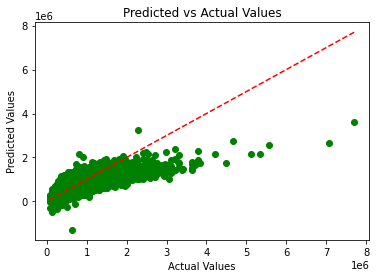

In [149]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()